In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


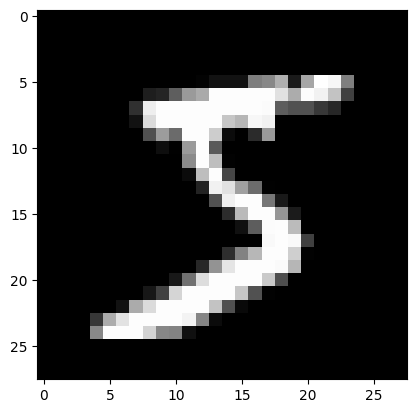

In [5]:
plt.imshow(x_train[0], cmap='gray') # imshow() function which simply displays an image.
plt.show() # cmap is responsible for mapping a specific colormap to the values found in the array that you passed as the first argument.

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')

In [10]:
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255

In [11]:
num_classes = 10
y_train = np.eye(num_classes)[y_train] # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test]

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #returns a sequence of another vectors of dimension 512
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
optimizer=RMSprop(),
metrics=['accuracy'])


In [14]:
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1, # verbose=1 will show you an animated progress bar eg. [==========]
validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.2562 - accuracy: 0.9209 - val_loss: 0.1022 - val_accuracy: 0.9680
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1057 - accuracy: 0.9671 - val_loss: 0.0969 - val_accuracy: 0.9706
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0744 - accuracy: 0.9770 - val_loss: 0.0653 - val_accuracy: 0.9802
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0689 - val_accuracy: 0.9798
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0458 - accuracy: 0.9857 - val_loss: 0.0678 - val_accuracy: 0.9814
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0643 - val_accuracy: 0.9818
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0703 - val_accuracy: 0.981

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08159882575273514
Test accuracy: 0.9847000241279602
